# Insights in Python

*David Gardenier & Leon Oostrum | ASTRON | University of Amsterdam*

Based on materials from the [2018 Asterics and Obelics School](https://indico.in2p3.fr/event/16864/)

In [ ]:
%matplotlib inline
from IPython.core.magic import register_line_magic
from astropy.visualization import quantity_support
import numpy as np
import numba as nb
import pandas as pd
import matplotlib as mpl

# Set up plotting details
plt = mpl.pyplot
mpl.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2

# Beautify error messages
@register_line_magic
def shorterr(line):
    """Show only the exception message if one is raised."""
    try:
        output = eval(line)
    except Exception as e:
        print("\x1b[31m\x1b[1m{e.__class__.__name__}: {e}\x1b[0m".format(e=e))
    else:
        return output
    
del shorterr

## Contents

 - [Working with code](#working-with-code)
     - IPython
     - IDEs
     - Jupyter
     - Git
     - Github / Travis / Coveralls
     - VirtualEnv / Conda

 - [Good coding practices](#good-code)
     - Docstrings
     - Doctest
     - Unit Testing
     - Debugging
     - Profiling

  - [Speeding up code](#speeding-up-code)
     - Numpy (incl. ufuncs) 
     - Numba

 - [Timesavers](#timesavers)
     - fstrings
     - Classes
     - Decorators     
     - Pandas
     - Astropy & Matplotlib

 - [Fun stuff](#fun-stuff)
     - Julia
     - Machine Learning

## Working with code <a name="working-with-code"></a>

### IPython

Still typing `python` to test things out in Python? Use `ipython` instead - it allows you to adapt code with a lot more ease. 

Try for instance typing, and changing, a function in both `python` and `ipython`

In [ ]:
def function(x):
    a = 2
    c = 10
    return a*x + c

### Integrated Development Environment (IDE)
Still using `gedit`, notepad and other such programs? You'll find IDEs will help you save time by helping completing functions, providing code templates and more.

Code a lot in Python? Try out [Atom](https://atom.io/), [Pycharm](https://www.jetbrains.com/pycharm/) etc.

#### For instance, from autocompleting code ...
![auto_complete](media/auto_complete.gif)

#### ... to check for mistakes ...
![linter](media/linter.gif)

#### ... and interactive coding
![hydrogen](media/hydrogen.gif)

### Jupyter

Wanting to quickly explore data? `jupyter notebook` or `jupyter lab` provide an easy way to interactively run just the parts of the code you want to change. While they don't have the functionality of an IDE, for purely exploratory or tutorial reasons they can be pretty convenient as they encourage text amongst code. 

![lab](media/jupyter_lab.gif)

### Git

Everyone should use git. Seriously. You'll no longer need to worry about breaking a working version of your code. Don't worry about learning all the commands - these days there are GUIs like [Gitkraken](https://www.gitkraken.com/) which do the hard work for you.

#### What can it look like?
![git-workflow](media/git_workflow.png)

### Github / Travis / Coveralls

Want to have a backup of your data? Or collaborate on code without sending having to send through files or code fragments? Check out [Github](https://github.com/) and apply for a [Student Developer Pack](https://education.github.com/pack) or an [Academic Research Pack](https://help.github.com/articles/applying-for-an-academic-research-discount/).

Want your code to automatically be tested when it arrives on Github? Try linking it up with [Travis](https://travis-ci.org/)

And want to know which percentage of your code you've tested? Then try [Coveralls](https://travis-ci.org/)

![git_badges](media/badges.png)

### VirtualEnv / Conda
Ensuring your results can be replicated is crucial. Especially if it's yourself at the end of your PhD. How can you do that? By keeping your software dependancies in their own environment. There are two common methods:

1. Virtual Environments
2. Conda

How do you set these up?

In [ ]:
# Check which python you're running
! which python

# Make a project folder for your antelope code
! mkdir ~/Downloads/antelope

# Set up a virtual enviroment
! python3 -m venv ~/Downloads/antelope/example-env

# Activate the virtual enviroment
! source ~/Downloads/antelope/bin/activate

#### P.S. Bash aliases are amazing

If you're not using bash aliases - look into them. For instance, to start up a project in the morning I will simply type `antelope` which immediately does this:

```
alias antelope = 'cd ~/Downloads/antelope; source ./bin/activate; atom .'
```

## Good coding practices <a name="good-code"></a>

### Docstrings

Want to understand what somebody did? Use docstrings. If you follow a template, you can even use them in some useful ways.

In [ ]:
def func(arg1, arg2):
    """Summary line.

    Extended description of function.

    Args:
        arg1 (int): Description of arg1
        arg2 (str): Description of arg2

    Returns:
        bool: Description of return value

    Raises:
        ValueError: If `arg2` is equal to `arg1`.

    Examples:
        Examples should be written in doctest format, and should illustrate how
        to use the function.

        >>> a = [1,2,3]
        >>> print([x + 3 for x in a])
        [4, 5, 6]

    """
    if arg1 == arg2:
        raise ValueError('arg1 may not be equal to arg2')
    return True

### Doctest

In [ ]:
def fib(n):
    """Calculates the n-th Fibonacci number.  

    >>> fib(0)
    0
    >>> fib(15)
    610

    """
    a, b = 0, 1
    for i in range(n):
        a, b = b, a + b
    return a

How do you run it?

```
$ python3 -m doctest -v <file>
```

Producing

```
Trying:
    fib(0)
Expecting:
    0
ok
Trying:
    fib(15)
Expecting:
    610
ok
1 items had no tests:
    test
1 items passed all tests:
   2 tests in test.fib
2 tests in 2 items.
2 passed and 0 failed.
Test passed.
```

### Unit Testing

Creating automated testing of your code is important. You're going to be testing it while writing your code, so why not automise it so that you can easily run those test again? Doctests can work, but there's also `unittest`.

In [1]:
import unittest

# Define the function
def fun(x):
    return x + 1

# Define the tests
class MyTest(unittest.TestCase):
    def test(self):
        self.assertEqual(fun(3), 4)

# Run the unit test (the argv is just for jupyter notebooks)
if  __name__  == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

.
----------------------------------------------------------------------
Ran 1 test in 0.001s

OK


### Debugging

Most people simply use `print()` statements to debug. But you can do better than that...

In [3]:
import time

def complicated_function():
    time.sleep(2)
    x, y, z = 1, '2', 3
    
    # Usually you might do this
    print(type(y))
    
    return y+3
    
complicated_function()

<class 'str'>


TypeError: must be str, not int

In [4]:
import time

def complicated_function():
    time.sleep(0.5)
    x, y, z = 1, '2', 3
    
    # But how about
    import IPython; IPython.embed()
    
    return y+3
    
complicated_function()

Python 3.6.6 (default, Sep 12 2018, 18:26:19) 
Type 'copyright', 'credits' or 'license' for more information
IPython 7.1.1 -- An enhanced Interactive Python. Type '?' for help.

In [1]: x
Out[1]: 1

In [2]: y
Out[2]: '2'

In [3]: z
Out[3]: 3

In [4]: type(z)
Out[4]: int

In [5]: quit()



TypeError: must be str, not int

Let's try this again, but with a more complicated traceback

In [5]:
def upper_func(x):
    return x + 1 + 'error'

def middle_func(x):
    return upper_func(x) + 1

def lower_func(x):  
    return middle_func(x) + 1

for i in range(1):
    answer = lower_func(i)

print(answer)

TypeError: unsupported operand type(s) for +: 'int' and 'str'

Using ipdb (IPython DeBugging tool), you can navigate the traceback (up/down), print variables (print) and continue with code execution (continue)

In [6]:
def upper_func(x):
    return x + 1 + 'error'

def middle_func(x):
    import pdb; pdb.set_trace()
    return upper_func(x) + 1

def lower_func(x):
    return middle_func(x) + 1

for i in range(10):
    answer = lower_func(i)

> <ipython-input-6-8a5bbbfd219e>(6)middle_func()
-> return upper_func(x) + 1
(Pdb) x
0
(Pdb) y
*** NameError: name 'y' is not defined
(Pdb) continue


TypeError: unsupported operand type(s) for +: 'int' and 'str'

### Profiling

The simplest is using the `time` or `timeit` library. In a jupyter notebook it can be invoked using

In [7]:
%%time

def upper_func(x):
    return x + 1

def middle_func(x):
    [upper_func(i) for i in range(10000)]
    return upper_func(x) + 1

def lower_func(x):
    time.sleep(1)
    return middle_func(x) + 1

lower_func(5)

CPU times: user 369 µs, sys: 7.34 ms, total: 7.71 ms
Wall time: 1.01 s


In [8]:
%%timeit

def upper_func(x):
    return x + 1

def middle_func(x):
    [upper_func(i) for i in range(10000)]
    return upper_func(x) + 1

def lower_func(x):
    time.sleep(1)
    return middle_func(x) + 1

lower_func(5)

1.01 s ± 331 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


But where's the slowest part? Try profiling your code using a bash function

```
profile() { python3 -m cProfile -o ~/Downloads/temp.profile $1; snakeviz ~/Downloads/temp.profile;}
```

Still not sure? Try line profiling your code using the bash function (you might need to pip install it first)
```
lineprofile() { kernprof -l -v $1;}
```

#### psutil

In [ ]:
from psutil import Process

p = Process()
p.cpu_percent()
p.memory_full_info().rss / 1e6 # in MB

#### psrecord

![psrecord](media/compute_and_io.png)

## Speeding up code <a name="speeding-up-code"></a>

### Numpy / Numba

#### Creating arrays

In [9]:
import numpy as np

In [10]:
np.empty(10)

array([ 1.67117665e-316,  6.93245332e-310,  3.12140488e-308,
       -3.38460686e+125,  3.69028917e+180,  3.40008234e-308,
        7.76717762e-299,  4.31069721e-188,  2.89553947e-024,
        7.50057371e+247])

In [11]:
np.ones((4,10))

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

#### You can set the data type

In [12]:
np.eye(5, dtype=int)

array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1]])

In [13]:
a = np.eye(5, dtype=int)
np.ones_like(a)

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]])

#### Broadcasting

In [15]:
g = np.array([1, 2, 3, 4])
h = np.array([5, 6, 7, 8])
g * h  # if the shapes match, operations are usually done element-by-element

array([ 5, 12, 21, 32])

In [16]:
g * 23 # the rule relaxes when the shapes meet certain constraints

array([23, 46, 69, 92])

### Broadcasting rules
- NumPy compares the shapes element-wise, starting with the trailing dimension
- two dimensions are compatible if they are equal or one of them is __1__
- raises a `ValueError: frames are not aligned` if the shapes are incompatible
- the size of a successfully broadcasted array is the maximum size along each dimension of the input arrays

### Operation on two arrays with different shapes
```
A      (4d array):  5 x 1 x 4 x 1
B      (3d array):      7 x 1 x 5
Result (4d array):  5 x 7 x 4 x 5
```

In [17]:
A = np.array([[1, 2, 3], [4, 5, 6]])
B = np.array([[1], [2]])
C = A + B

print(f"A shape: {A.shape}")
print(f"B shape: {B.shape}")
print(f"C shape: {C.shape}")

print(C)

A shape: (2, 3)
B shape: (2, 1)
C shape: (2, 3)
[[2 3 4]
 [6 7 8]]


#### Universal functions

#### A `ufunc` is a "vectorized" wrapper for a function that takes a fixed number of scalar inputs and produces a fixed number of scalar outputs.

NumPy provides a bunch of `ufunc`s:
- Math operations (`add()`, `subtract()`, `square()`, `log10()`, ...)
- Trigonometric functions (`sin()`, `cos()`, `tan()`, `deg2rad()`, ...)
- Bit-twiddling functions (`bitwise_and()`, `right_shift()`, ...)
- Comparison functions (`greater()`, `less_equal()`, `fmax()`, ...)
- Floating functions (`isnan()`, `isinf()`, `floor()`, ...)
    
They all are subclasses of `np.ufunc`

#### A ufunc is a "vectorized" wrapper for a function

In [18]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

ar = np.array([-10, 10, 100])
%shorterr step_function(ar)

UsageError: Line magic function `%shorterr` not found.


In [19]:
ustep_function = np.vectorize(step_function)

ustep_function(ar)

array([0, 1, 1])

#### Speed up your code

In [20]:
ar = np.random.random(12345678)

# Silly function
def step_function_python(a):
    output = np.zeros_like(a)
    for i, nr in enumerate(a):
        if nr > 0:
            output[i] = 1

%time step_function_python(ar)

CPU times: user 3.53 s, sys: 7.79 ms, total: 3.53 s
Wall time: 3.53 s


In [21]:
# Numpy version of step function
def step_function_numpy(a):
    output = np.zeros_like(a)
    a[a > 0] = 1
    

%time step_function_numpy(ar)

CPU times: user 38.2 ms, sys: 28.6 ms, total: 66.8 ms
Wall time: 65.1 ms


In [23]:
import numba as nb
@nb.jit()
def step_function_python(a):
    output = np.zeros_like(a)
    for i, nr in enumerate(a):
        if nr > 0:
            output[i] = 1

%time step_function_python(ar)
%time step_function_python(ar)
%time step_function_python(ar)

CPU times: user 139 ms, sys: 23.6 ms, total: 163 ms
Wall time: 173 ms
CPU times: user 14.8 ms, sys: 32.4 ms, total: 47.2 ms
Wall time: 47.1 ms
CPU times: user 14.9 ms, sys: 32.4 ms, total: 47.3 ms
Wall time: 47.2 ms


## Timesavers <a name="timesavers"></a>

### f-strings (Python 3.6+)

In [24]:
first_name = "James"
last_name = "Bond"

# old style
print("My name is %s %s" % (first_name, last_name))

My name is James Bond


In [26]:
# format syntax
print("My name is {} {}".format(first_name, last_name))
# can change the order
print("My name is {1}, {0} {1}".format(first_name, last_name))

My name is James Bond
My name is Bond, James Bond


In [27]:
# formated string (Python ≥ 3.6)
print(f"My name is {first_name} {last_name}")

My name is James Bond


In [28]:
x = 5
print(f"The solution is {np.exp(x)*5+2:.2f}")

The solution is 744.07


### Classes

In [29]:
class Planet(object):
    def __init__(self, name, radius, mass):
        self.name = name
        self.radius = radius
        self.mass = mass
        
    def density(self):
        return 3. * self.mass / (4 * np.pi * self.radius**3)

    def __repr__(self):
        return f"This planet is {self.name}."

In [30]:
this_planet = Planet("Earth", 6.4E6, 6.0E24)
other_planet = Planet("Mars", 3.4E6, 6.4E23)

print(this_planet)  

This planet is Earth.


In [31]:
for planet in (this_planet, other_planet):
    print(f"The density of {planet.name} is {planet.density():.2f} kg/m3")

The density of Earth is 5464.15 kg/m3
The density of Mars is 3887.36 kg/m3


### Decorators

In [32]:
import time

def timer(function):
    def wrapper():
        tstart = time.time() * 1000
        function()
        tend = time.time() * 1000
        print(f"It took {tend-tstart:.2f} ms to run")
    return wrapper

In [34]:
def some_function():
    x = []
    for i in range(100000):
        x.append(i)
    print(f"The sum of the numbers is {np.sum(x)}")
    
some_function()

The sum of the numbers is 4999950000


In [35]:
@timer
def some_function():
    x = []
    for i in range(100000):
        x.append(i)
    print(f"The sum of the numbers is {np.sum(x)}")
    
some_function()

The sum of the numbers is 4999950000
It took 18.18 ms to run


### Pandas

In [36]:
data = {'a': [4.1, 10, 6.3],
        'b': ['foo', 'bar', 'baz'],
        'c': 42}
data

{'a': [4.1, 10, 6.3], 'b': ['foo', 'bar', 'baz'], 'c': 42}

In [37]:
import pandas as pd
df = pd.DataFrame(data)
df

,a,b,c
0,4.1,foo,42
1,10.0,bar,42
2,6.3,baz,42


In [38]:
df['a']

0     4.1
1    10.0
2     6.3
Name: a, dtype: float64

In [39]:
df.describe()

,a,c
count,3.00000,3.0
mean,6.80000,42.0
std,2.98161,0.0
min,4.10000,42.0
25%,5.20000,42.0
50%,6.30000,42.0
75%,8.15000,42.0
max,10.00000,42.0


AttributeError: 'DataFrame' object has no attribute 'show'

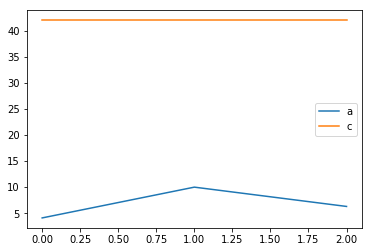

In [41]:
df.plot()
df.show()

In [43]:
s = pd.Series(np.random.random(5))
s

0    0.608234
1    0.330522
2    0.645807
3    0.117796
4    0.815099
dtype: float64

In [44]:
s_sorted = s.sort_values()  # Indices are kept
print(s_sorted)

3    0.117796
1    0.330522
0    0.608234
2    0.645807
4    0.815099
dtype: float64


In [45]:
print(s_sorted[0])  # Return value with index 0

0.6082337445711219


In [47]:
print(s_sorted.loc[0])  # Return value with index 0

0.6082337445711219


In [ ]:
print(s_sorted.iloc[0])  # Return first element

### Astropy / Matplotlib

#### Units and Quantities

In [48]:
import astropy.constants as const
import astropy.units as u

# distance sun - earth
distance_sun = 1 * u.au
# speed of light
speed = const.c
# time
time_sun = distance_sun / speed
print("Light travels from sun to earth in {:.2f}".format(time_sun.to('min')))

Light travels from sun to earth in 8.32 min


In [53]:
@u.quantity_input(wavelength=u.nm, temperature=u.K)
def blackbody(wavelength, temperature):
    pre_factor = 2 * const.h * const.c**2 / wavelength**5
    exponential_factor = 1. / (np.exp((const.h * const.c) / (wavelength * const.k_B * temperature)) - 1)
    return pre_factor * exponential_factor

In [54]:
temp = 6000 * u.K
wav = np.linspace(300, 900) * u.nm
radiance = blackbody(wav, temp).to('W m-2 nm-1')

In [55]:
wav = np.linspace(300, 900) * u.Hz
blackbody(wav, temp) 

UnitsError: Argument 'wavelength' to function 'blackbody' must be in units convertible to 'nm'.

In [56]:
with quantity_support():
    plt.plot(wav, radiance)

NameError: name 'quantity_support' is not defined

#### Coordinates

In [57]:
from astropy.coordinates import SkyCoord

coord_crab = SkyCoord.from_name('crab')
galactic_center = SkyCoord(0, 0, unit='deg', frame='galactic')
coord_crab.separation(galactic_center)

<Angle 172.64074979 deg>

#### You can plot source visibility curves

![crab](media/crab_visibility.png)

In [ ]:
from astropy.coordinates import EarthLocation, AltAz
from astropy.time import Time
import numpy as np
from astropy.visualization import quantity_support

# current location
here = EarthLocation(lat=52.354283*u.deg, lon=4.955042*u.deg)

# Array of times
time_intervals = np.linspace(-.5 * u.day, .5 *u.day, 100)
times = Time.now() + time_intervals

# Get AltAz coordinates
altaz = AltAz(obstime=times, location=here)
crab_altaz = coord_crab.transform_to(altaz)

# Get altitude 
altitudes = crab_altaz.alt.to('deg')
alt_min = 20 * u.deg
alt_max = 50 * u.deg
visible = (altitudes > alt_min) & (altitudes < alt_max)

with quantity_support():
    plt.plot_date(times.plot_date, altitudes, fmt='-')
    plt.gcf().autofmt_xdate()
    plt.xlim(times.plot_date[0], times.plot_date[-1])
    plt.axhline(0, ls='--', c='k')
    plt.xlabel('Date')
    plt.ylabel('Altitude (deg)')

   #### Sky images

In [62]:
from astropy.io import fits
from astropy.wcs import WCS
from astropy.visualization import AsinhStretch
import matplotlib.pyplot as plt

filenames = ['data/casa_0.5-1.5keV.fits.gz', 'data/casa_1.5-3.0keV.fits.gz', 'data/casa_4.0-6.0keV.fits.gz']

# use asinh stretching to brighten up the image
stretch = AsinhStretch(0.04)

data_rgb = []

for filename in filenames:
    image_hdu = fits.open(filename)['PRIMARY']
    wcs = WCS(image_hdu.header)
    data = image_hdu.data
    data /= data.max()
    data = stretch(data)
    data_rgb.append(data)

data_rgb_stacked = np.stack(data_rgb, axis=2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


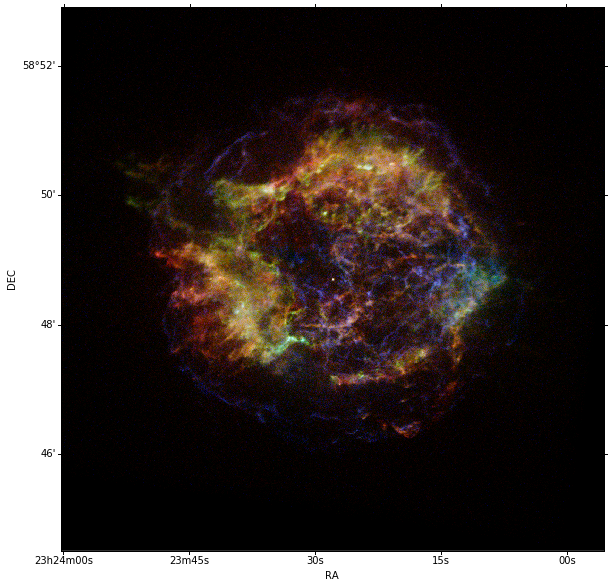

In [63]:
plt.figure(figsize=(10, 10))
ax = plt.subplot(projection=wcs)
ax.imshow(data_rgb_stacked, origin='lower')
ax.coords['ra'].set_major_formatter('hh:mm:ss')

ax.set_xlabel('RA')
ax.set_ylabel('DEC')

## Fun Stuff <a name="fun-stuff"></a>

### Julia

Python's great - but so was Fortran back in the day. Where is the momentum heading? At the moment Python and C are remaining fairly stable, but one of the favoured contenders is `Julia`.

#### How does it compare?
![julia](media/julia_performance.png)

#### Why is it popular?

The speed is equivalent to `C`, yet it has the declarative power of Python. It uses a tree-like model to declare variables, making it pretty fast.

### Machine Learning

#### What is "Machine Learning"?

Using **machines** to **learn** how to explain data with models.

The "machines" responsible for most of the progress in ML are:
 - software algorithms
 - hardware architectures
 - human ingenuity
 

The "learning" consists of passively identifying statistical correlations, which is very different from how we learn with active experimentation and identifying causal relationships.

#### What is a Model?

Two important types of models: generative, probabilistic.

All ML algorithms use a model to explain your data.

Models have parameters. Parameters of the ML algorithm are _hyperparameters_

![models1](media/models1.png)

#### What is Learning?

Three broad types of learning:

 - **Unsupervised: learn to predict new data.**
   - Given data: what patterns are present? (learn a model).
   - Given data and model: how likely is new data to be from same model? (generate new data).

 - **Supervised: Learn to predict specific features of new data.**
   - Classification: predict discrete features (learn a conditional model).
   - Regression: predict continuous features  (learn a conditional model).

 - **Inference: explain observed data.**
   - Assuming a model: what parameters (with what uncertainties) best describe my data? (learn a model).
   - Given competing models: which best describes my data? (model selection).

 - **Also: reinforcement learning.**

- ** Unsupervised **:
  - e.g. find clusters in high-dimensional space, dimensionality reduction (note: usually need data with zero mean, unit std dev)
- ** Supervised **:
  - Nearest neigbords
  - Random Forest
  - Support Vector Machine
- ** Inference **:
  - A bit like statistics: what parameters + uncertainties best describe my data?
- ** Reinforcement **:
  - Given a state of the environment, decide on an action. Get back new state and a 'reward' (e.g. score). Able to learn long-term gain vs short-term gain. Used for e.g. AlphaGo

![outline](media/outline.png)

#### Neural networks

- A "neuron" is $f(x) = \phi(W\,\mathbf{x} + b)$
  - $\phi$ is the _activation function_
  - $W$ is the _weight matrix_
  - $b$ is the _bias_

- **Dense neural network (DNN)**:
  - Input layer
  - One or more _hidden layers_
  - Output layer
  - Each neuron of a layer is connected to each neuron of the next layer

![nn-layer](media/nn-layer.png)

- **Convolutional neural network (CNN)**:
  - Assumes the input measures some property on a grid.
  - Each CNN layer has associated **kernels** which are separately convolved with each pixel of the layer's input to generate its output values.

![convnet](media/convnet.png)

#### Autoencoder

A network that learns to encode itself. Effectively a dimensionality reduction.

![AutoEncoder architecture](media/AutoEncoder.png)

#### Generative-adversarial network (GAN)

Building on the theme of a probabilistic generator, we can set up an "arms race" between two networks

 - A generative model that learns to synthesize realistic data.
 - An adversarial classifier that learns to distinguish between real and generated data.
 - Training works as follows:
   - Generate some random data.
   - Test how well the discriminator identifies the generated data as a fake.
   - Feed the same discriminator some real data.
   - Test how well the discriminator identifies the real data as real.

# Some Final Notes

## Acknowledgements

![group_photo](media/group_photo.png)

![](media/eu_asterics.png)
This tutorial was supported by the H2020-Astronomy ESFRI and Research Infrastructure Cluster (Grant Agreement number: 653477)

![](media/asterix.png)